# 簡單的線性轉換

我們會學到, 所謂的線性轉換不過是一個矩陣乘一個向量。比如說

$$ A \begin{bmatrix}x_1 \\ x_2 \end{bmatrix} $$

所以我們要學學在 Python 怎麼做, 並且觀察經過線性轉換, 
一個直線、圓形或其他圖形, 會映到哪什麼東西。

一開始, 我們還是讀入我們的標準套件。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 在數據分析以後可能常用用到 pandas, 只是現在我們還沒用。
# import pandas as pd

## 1. array oriented

數據分析很重要的「陣列導向」, 也就是「可以不用迴圈儘量不用迴圈」。我們看一個例子。原本的 list 和 array 有什麼不同的特性。

In [2]:
my_list = [1,2,3,4,5]

In [3]:
my_list*3

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

耶, 乘以 3 是重覆 3 倍, 那乘上一個浮點數 (顯然不行)

In [4]:
# my_list*3.4

可能有這種情況: 你在美國某購物網發現價格比台灣便宜, 有三件你有興趣的東西, 價格分別是這樣。

In [5]:
p = [199, 299, 399]

換成 array

In [6]:
price = np.array(p)

# price = np.array([199, 299, 399])

看起來和 list 也差不多

In [7]:
price

array([199, 299, 399])

Google 一下, 現在 1 美金大約是 29.16 台幣。

In [8]:
price * 29.16

array([  5802.84,   8718.84,  11634.84])

一次搞定! (這個動作叫 `numpy` 的 broadcasting)

你又突然發現, 其實要運費 20 美金, 於是你想看看買其中一項時的價格...

In [9]:
price + 20

array([219, 319, 419])

又突然發現, 其實三件物品重量不同, 所以運費也不同!

In [10]:
shp = np.array([20, 25, 30])

In [11]:
price + shp

array([219, 324, 429])

## 2. 矩陣表示和 slicing

一個 2D array 基本上就是個矩陣。我們會發現其實就是一列一列輸入。

In [12]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

In [13]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### 取出某一列

要取出一列的方法很容易。

In [14]:
A[0]

array([1, 2, 3])

### 取出一個元素

現在我們要取出第 1 列, 第 0 行的元素 (記得 Python 從 0 開始算起。)

In [15]:
A[1][0]

4

在 `numpy` 其實有更接近我們數學的寫法...

In [16]:
A[1,0]

4

### 取出某一行

記得矩陣都「先列後行」, 取出一行是「某列的全部, 某行」這樣的寫法。

In [17]:
A[:,1]

array([2, 5, 8])

### 純量乘法

In [18]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [19]:
2*A

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

加上一個數字事實上是把每一個元素加上一個數字。

In [20]:
A+2

array([[ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## 3. 矩陣的乘法

我們先定義 A, B 兩個矩陣, 我們想知道怎麼做矩陣乘法。

In [21]:
A = np.array([[1,2],[3,4]])
B = np.array([[1,-1],[2,0]])

In [22]:
A

array([[1, 2],
       [3, 4]])

In [23]:
B

array([[ 1, -1],
       [ 2,  0]])

### dot product

我們先來做很基本的 dot product

In [24]:
u = np.array([1,2])
v = np.array([3,4])

In [25]:
np.dot(u,v)

11

在新版的 `numpy`, 事實上已改用這個方式。

In [26]:
u@v

11

記得 `u*v` 反而不是我們要的。

In [27]:
u*v

array([3, 8])

### 矩陣乘法

其實 `'@'` 也就是矩陣乘法。

In [28]:
A@B

array([[ 5, -1],
       [11, -3]])

In [29]:
A

array([[1, 2],
       [3, 4]])

In [30]:
B

array([[ 1, -1],
       [ 2,  0]])

再一次, 用 `.dot` 是一樣的

In [31]:
np.dot(A,B)

array([[ 5, -1],
       [11, -3]])

## 4. 線性轉換

現在我們要介矩陣乘法很重要的例子, 就是做線性轉換。抽象的說, 就是我們有個 $m\times n$ 的矩陣 $A$。它會把一個 $n$ 維的向量 $\mathbf{x}$, 經轉換變為 $m$ 維向量。也就是

$$\mathbf{x} \in \mathbb{R}^n$$

經轉換後

$$A \mathbf{x} \in \mathbb{R}^m$$

我們以簡單的 $2 \times 2$ 矩陣為例, 此時

$$\mathbf{x} = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

$\mathbb{x}$ 經線性轉換會變為另一個 $2$ 維向量:

$$ \mathbf{y} = A \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}$$

### 例子

我們定義一個 $2 \times 2$ 的矩陣。

In [32]:
A

array([[1, 2],
       [3, 4]])

假設我們有個叫做

$$\mathbf{u} = \begin{bmatrix}1 \\ 3\end{bmatrix}$$

我們想用 $A$ 做線性轉換。照理說我們應該這麼令 $\mathbf{u}$。

In [33]:
u = np.array([[1],
             [3]])

In [34]:
A@u

array([[ 7],
       [15]])

事實上我們可以不用這樣做! (想想 `numpy` broadcasting 的原理)

In [35]:
v = np.array([1,3])

In [36]:
A@v

array([ 7, 15])

## 5. 線性轉換對圖形的影響

我們來試試線性轉換對一個圖會有什麼影響。比如說, 本來一條過原點的直線, 經線性轉換會如何呢?

### 畫圖

回憶一下我們怎麼畫, 例如 $y=3x$ 的圖。

In [37]:
x = np.linspace(-5,5,100)

In [38]:
y = 3*x

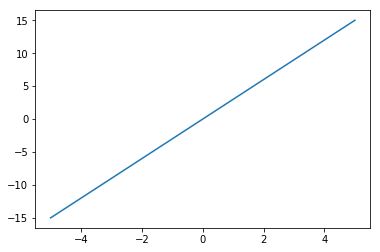

In [39]:
plt.plot(x,y)

### 插播: xy 變換

我們常要做一件事, X, Y 座標本來可能是分開的:

$$[x_1, x_2, \ldots, x_k]$$

和

$$[y_1, y_2, \ldots, y_k]$$

然後要 1, 2, 3 就變成

$$[[x_1, y_1], [x_2, y_2], \ldots, [x_k, y_k]]$$

這種形式。

In [40]:
xy = np.c_[x,y]

In [41]:
xy.shape

(100, 2)

### 用 A 在這些點做線性轉換

如果我們只是要弄成

$$[[x_1, x_2, \ldots, x_k], [y_1, y_2, \ldots, y_k]]$$

那就更簡單。

In [42]:
xy  = np.array([x,y])

In [43]:
xy.shape

(2, 100)

這樣 $A$ 就可以直接乘上去!

In [44]:
Axy = A@xy

In [45]:
Axy.shape

(2, 100)

### 畫出圖來

我們要再度從 `Axy` 拿出只有 x 座標:

    Axy[0]
    
只要 y 座標

    Axy[1]

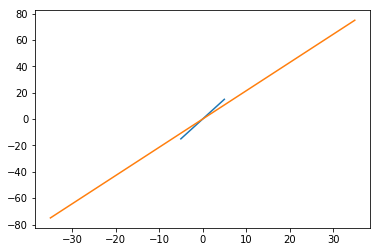

In [46]:
plt.plot(x,y)
plt.plot(Axy[0], Axy[1])

這有點怪, 指定個範圍畫...

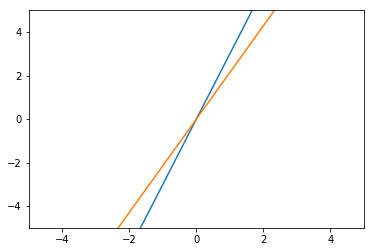

In [47]:
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.plot(x,y)
plt.plot(Axy[0], Axy[1])

## 6. 參數式畫圖

用參數式我們可以更自由的畫圖。語法就是, 嗯,

    plt.plot(x,y)
    
其中 x 是點的 x 座標的 array, y 就是 y 座標的 array。

### 回憶參數式

用 $(r, \theta)$ 極座標轉 x, y:

$$\begin{align*}
x &= r\cos(\theta) \\
y &= r\sin(\theta)
\end{align*}$$

In [48]:
θ = np.linspace(0, 2*np.pi, 200)

因為 Python 3 基本上用 unicode, 所以你可以用像 $\theta$ 當成變數。但是 $\theta$ 怎麼打出來呢? 就像 LaTeX, 試著在你的 code 區打入

    \theta
    
然後按 `Tab` 鍵... 

In [49]:
r=1

In [50]:
x = r*np.cos(θ)
y = r*np.sin(θ)

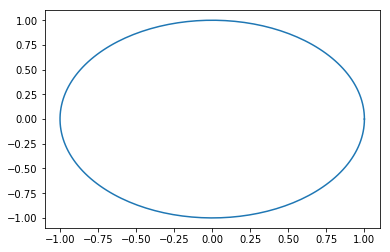

In [51]:
plt.plot(x,y)

這不圓怎麼辦?

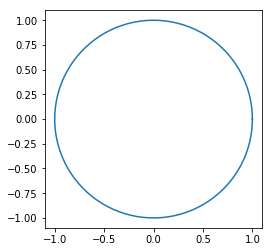

In [52]:
ax = plt.gca()
ax.set_aspect("equal")

plt.plot(x,y)

你也可以試試先設不同的 $r$, 比如說:

In [53]:
r = 1-np.sin(θ)

In [54]:
x = r*np.cos(θ)
y = r*np.sin(θ)

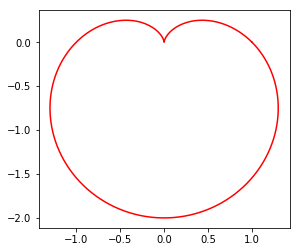

In [55]:
ax = plt.gca()
ax.set_aspect("equal")

plt.plot(x,y,'r')

## [習題] 線性轉換

請用一個 $2\times 2$ 的矩陣 $A$, 把一個你給定的圖, 經線性轉換轉成另一個圖。試試你能不能預測會發生什麼事? 你可以試的圖有

* 「不過原點」的直線
* 圓形 (過原點或不過原點)
* 其他圖形